In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Árboles de decisión
## Árboles de regresión

Para practicar el modelo de árbol de regresión, vamos a usar el dataset **Hitters**. Recordemos que contiene datos de jugadores de beisbol de la liga estadounidense de 1986 y 1987. Contiene 322 observaciones con 20 datos. Lo que queremos hacer es tener alguna regresión de los salarios de 1987 los jugadores usando como base los datos de ellos de su perfomance en 1986.

In [179]:
# Cargamos el dataset
df_hitters = pd.read_csv("./Hitters.csv")

In [180]:
df_hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [181]:
df_hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [182]:
# Como los datos de salario no están completos, descartamos a aquellos jugadores que no tienen ese dato.
df_hitters.dropna(subset="Salary", inplace=True)

In [183]:
# Aplico feature engineering, modificando el target por el logaritmo
df_hitters["Salary_log"] = np.log1p(df_hitters["Salary"])

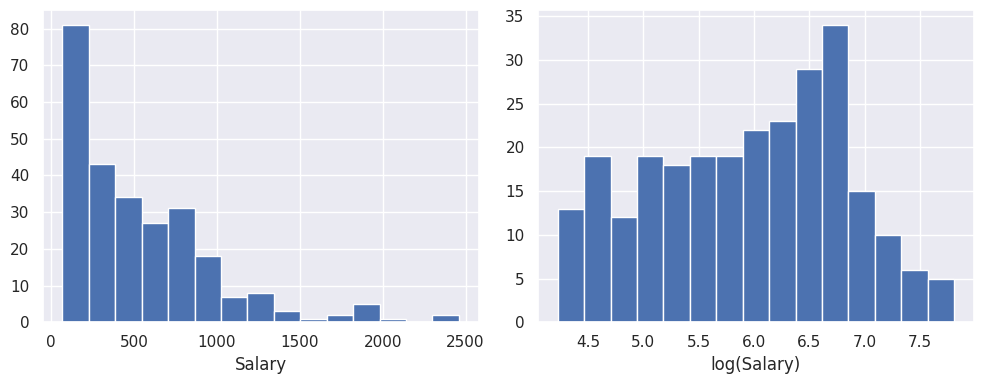

In [184]:
f, ax = plt.subplots(1,2, figsize=(10, 4))
df_hitters["Salary"].hist(ax=ax[0], bins=15)
df_hitters["Salary_log"].hist(ax=ax[1], bins=15)

ax[0].set_xlabel("Salary")
ax[1].set_xlabel("log(Salary)")
plt.tight_layout()

Como podemos ver, mejoramos la dispersion de datos, principalmente aquellos que están en los primeros bins.

----

Trabajemos en el modelo

Empezamos separando los datos, para este ejemplo, solo voy a usar *Hits, Putouts, RBI, Runs, Walks y Years*. Que significa cada cosa está [explicado aquí.](https://rdrr.io/cran/ISLR/man/Hitters.html)

In [185]:
# Para este ejemplo, solo voy a usar Years, RBI, PutOuts, Hits, Walks, Run como atributos. 
X = df_hitters.loc[:, ["Hits", "PutOuts", "RBI", "Runs", "Walks", "Years"]]
# Y como variable a predecir a Salary_log
y = df_hitters.loc[:, "Salary_log"]

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Ahora vamos a aplicar el procedimiento que vimos, primero llamamos al modelo de [arbol de regresion](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [187]:
from sklearn.tree import DecisionTreeRegressor

In [188]:
# Creamos el arbol
regression = DecisionTreeRegressor(criterion='squared_error', splitter='best', 
                                   max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                   random_state=42)
# Y entrenamos
regression.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Podemos ver cuales son los parámetros de creación del modelo (esto sale en la documentación misma y es común a todos los modelos) usando `.get_params()`.

In [189]:
regression.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

Podemos ver a nuestro arbol para entender que hizo usando [export_graphviz:](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)

In [190]:
from sklearn.tree import export_graphviz
export_graphviz(regression, out_file = "arbol_regresion.dot",
                feature_names=["Hits", "PutOuts", "RBI", "Runs", "Walks", "Years"],
                rounded=True,
                filled=True)

Podemos ver nuestro arbol en [webgraphviz](http://www.webgraphviz.com/?tab=map). Esta página nos mostrará la disposición de nuestros nodos y como el algoritmo fue tomando decisión de las diferentes divisiones.

Es por esto que prefiero usar la herramienta web, se puede trabajar, para mejorar la gráfica:

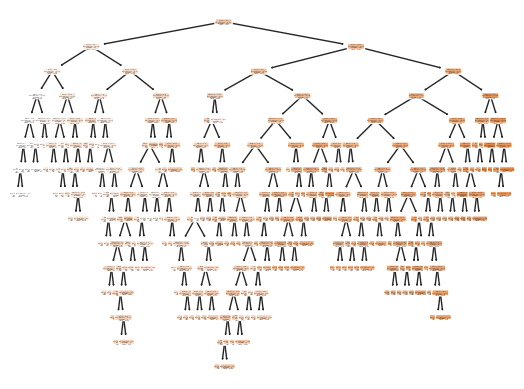

In [191]:
from sklearn.tree import plot_tree
plot_tree(regression, filled=True, feature_names=["Hits", "PutOuts", "RBI", "Runs", "Walks", "Years"], rounded=True);

Midamos como este modelo performa usando el error medio absoluto:

In [192]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

y_pred_train = regression.predict(X_train)
y_pred = regression.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae = mean_absolute_error(y_test, y_pred)

print(f"El error de entreamiento fue: {mae_train}")
print(f"El error de testeo fue: {mae}")

El error de entreamiento fue: 0.0
El error de testeo fue: 0.43627758860606863


Este resultado es muy malo, si el entrenamiento es cero, es seguro que hay sobreajuste (esto lo esperábamos, porque elegimos que las hojas tengan una sola muestra). Pero comparemos con algún modelo, rápidamente para tener alguna referencia.

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

regresion_lineal = LinearRegression()

sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

regresion_lineal.fit(X_train_scaled, y_train)

y_pred_lineal = regresion_lineal.predict(X_test_scaled)

print(f"El error de testeo fue: {mean_absolute_percentage_error(np.expm1(y_test), np.expm1(y_pred_lineal))}")
print(f"El error de testeo (log) fue: {mean_absolute_percentage_error(y_test, y_pred_lineal)}")

El error de testeo fue: 0.6051165087472429
El error de testeo (log) fue: 0.09114453620208265


Asi y todo, rindió mejor que el modelo de regresión lineal, pero no por mucho.

----

Ahora intentemos podar el arbol, para ello vamos a usar el argumento [ccp_alpha](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning) que es el alfa que vimos en clase para podar árboles y búsqueda de hiper-parámetros para encontrar el mejor valor de alpha que logre podar el árbol pero minimizar lo más posible el error usando validación cruzada con 5 folds.

In [194]:
from sklearn.model_selection import cross_val_score

In [195]:
# Hagamos una ejecución de prueba
clf = DecisionTreeRegressor(criterion='squared_error', splitter='best', 
                            max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                            random_state=42, ccp_alpha=0)

scores = cross_val_score(clf, X_train, y_train, cv=5, 
                         scoring='neg_mean_absolute_error', n_jobs=-1)
scores = np.abs(scores)
print(scores)
print(f"El valor medio de MAE cuando alfa es cero: {np.mean(scores)}")

[0.54313114 0.43734172 0.46667164 0.70141255 0.6347676 ]
El valor medio de MAE cuando alfa es cero: 0.5566649298676067


Qué interesante! El error de CV es cercano al del set de testeo:

In [196]:
# Hagamos búsqueda de hiper-parámetro mediante búsqueda de grilla. Pero lo hacemos de forma "manual"
scores_list = []
alpha_array = np.linspace(0, 0.5, 100)
leaf_array = np.zeros_like(alpha_array)
for index, alpha in enumerate(alpha_array):
    clf = DecisionTreeRegressor(criterion='squared_error', splitter='best', 
                                max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                random_state=42, ccp_alpha=alpha)
    scores_list.append(np.abs(cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')))
    clf.fit(X_train, y_train)
    on_leaf = clf.apply(X_train)
    leaf_array[index] = len(np.unique(on_leaf))

scores_array = np.array(scores_list)
del scores_list

df_results = pd.DataFrame({"alpha": alpha_array,
                           "on_leaf": leaf_array,
                           "mae1": scores_array[:, 0],
                           "mae2": scores_array[:, 1],
                           "mae3": scores_array[:, 2],
                           "mae4": scores_array[:, 3],
                           "mae5": scores_array[:, 4]})

df_results = pd.melt(df_results, id_vars=['alpha', 'on_leaf'], value_vars=["mae1", "mae2", "mae3", "mae4", "mae5"])

In [223]:
df_results.sort_values(['alpha', 'variable']).head(25)

,alpha,on_leaf,variable,value
0,0.000000,153.0,mae1,0.543131
100,0.000000,153.0,mae2,0.437342
200,0.000000,153.0,mae3,0.466672
300,0.000000,153.0,mae4,0.701413
400,0.000000,153.0,mae5,0.634768
1,0.005051,22.0,mae1,0.523295
101,0.005051,22.0,mae2,0.343817
201,0.005051,22.0,mae3,0.414137
301,0.005051,22.0,mae4,0.611521
401,0.005051,22.0,mae5,0.609831


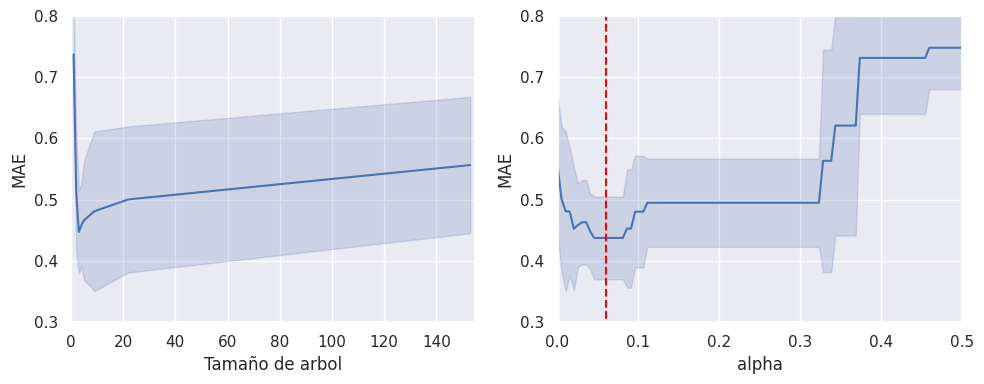

In [198]:
f, ax = plt.subplots(1,2, figsize=(10, 4))
sns.lineplot(data=df_results, x="on_leaf", y="value", errorbar="sd", ax=ax[0])
sns.lineplot(data=df_results, x="alpha", y="value", errorbar="sd", ax=ax[1])
ax[1].plot([0.06, 0.06], [-10, 10], color="red", linestyle="--")

ax[0].set_xlabel("Tamaño de arbol")
ax[0].set_ylabel("MAE")
ax[0].set_xlim([0, 155])
ax[1].set_xlim([0, 0.5])
ax[0].set_ylim([0.3, 0.8])
ax[1].set_ylim([0.3, 0.8])
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("MAE")
plt.tight_layout()

Elijamos el valor de alpha de 0.06: 

In [199]:
from sklearn.metrics import (mean_absolute_error, r2_score,
                             root_mean_squared_error, 
                             mean_absolute_percentage_error)

# Creamos el arbol
regression = DecisionTreeRegressor(criterion='squared_error', splitter='best', 
                                   max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                   random_state=42, ccp_alpha=0.06)
# Y entrenamos
regression.fit(X_train, y_train)

y_pred_train = regression.predict(X_train)
y_pred = regression.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE de entreamiento fue: {mae_train}")
print(f"MAE de testeo fue: {mae}")
print(f"RMSE de testeo fue: {rmse}")
print(f"MAPE de testeo fue: {mape}")
print(f"R2 de testeo fue: {r2}")

MAE de entreamiento fue: 0.41207126056400556
MAE de testeo fue: 0.4979392430140173
RMSE de testeo fue: 0.6844836325986055
MAPE de testeo fue: 0.08677688708872176
R2 de testeo fue: 0.4395536787874229


El modelo no mejoró, pero es mucho más general y tiene pocas ramas. Si lo vemos, nos damos cuenta que es el modelo que arrancamos la clase.

In [200]:
export_graphviz(regression, out_file = "arbol_regresion_alpha.dot",
                feature_names=["Hits", "PutOuts", "RBI", "Runs", "Walks", "Years"],
                rounded=True,
                filled=True)

El modelo de regresión que obtuvimos fue peor que el modelo de SVR que hicimos la clase anterior (0.39), aunque mejor que la regresión de Ridge (aunque no por mucho, 0.51).

| Modelo              | MAE  | RMSE   | MAPE   | R2   |
|---------------------|------|--------|--------|------|
| Regresion lineal    | 0.52 | 0.69   | 0.09   | 0.43 |
| Regresion Ridge     | 0.51 | 0.66   | 0.09   | 0.44 |
| Arbol de decision   | 0.49 | 0.68   | 0.09   | 0.44 |
| SVR                 | 0.39 | 0.57   | 0.07   | 0.58 |

---
## Árboles de clasificación

Para practicar el modelo de arbol de clasificación, vamos a usar el dataset [**Heart**](https://archive.ics.uci.edu/dataset/45/heart+disease).

Recordemos que son mediciones de 302 pacientes, con 13 atributos de variables fisiológicas. Además contamos con una columna de valores binarios llamada **target** que nos indica si el paciente tiene una enfermedad coronaria o no.

In [201]:
# Cargamos el dataset
df_heart = pd.read_csv("./heart.csv")

df_heart.drop_duplicates(inplace=True)

In [202]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [203]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [204]:
df_heart.target.value_counts()

target
1    164
0    138
Name: count, dtype: int64

Las clases están bastante balanceadas, voy a usar F1-Score como metrica de evaluación

---
Trabajemos en el modelo

Para este caso vamos a usar todos los atributos. Una ventaja del modelo de árbol es que no nos afecta el tipo de variable, podes usar variables categoricas sin problemas.

In [205]:
X = df_heart.iloc[:, :-1]
y = df_heart.iloc[:, -1]

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Ahora vamos a aplicar el modelo, primero llamamos al modelo de [árbol de clasificación](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [207]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el arbol
classification = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                        max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                        random_state=42)
# Y entrenamos
classification.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [208]:
classification.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

Podemos ver a nuestro arbol para entender que hizo usando export_graphviz

In [209]:
export_graphviz(classification, out_file = "arbol_clasificacion.dot",
                feature_names=df_heart.columns[:-1],
                class_names=["No tiene enfermedad cardiaca", "Tiene enfermedad cardiaca"],
                rounded=True,
                filled=True)

Midamos como este modelo performa usando el F1-score:

In [210]:
from sklearn.metrics import f1_score

y_pred_train = classification.predict(X_train)
y_pred = classification.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1 = f1_score(y_test, y_pred)

print(f"F1-score de entreamiento fue: {f1_train}")
print(f"F1-score de testeo fue: {f1}")

F1-score de entreamiento fue: 1.0
F1-score de testeo fue: 0.7228915662650602


In [211]:
classification.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

Podemos hacer una búsqueda de hiper-parámetros pero buscando con otros parámetros del modelo, usando optuna:

In [212]:
import optuna 

def objective(trial):
    max_depth = trial.suggest_int("max_depth", 1, 30)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)

    classifier = DecisionTreeClassifier(criterion=criterion, splitter='best', 
                                        max_depth=max_depth, min_samples_split=min_samples_split, 
                                        min_samples_leaf=min_samples_leaf, random_state=42)
    
    # Realizamos la validación cruzada
    score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
    
    return score.mean()

In [213]:
def champion_callback(study, frozen_trial):
    """
    Mostramos menos información, sino es demasiado verboso
    """
    winner = study.user_attrs.get("winner", None)
    if study.best_value and winner != study.best_value:
        study.set_user_attr("winner", study.best_value)
        if winner:
            improvement_percent = (abs(winner - study.best_value) / study.best_value) * 100
            print(
                f"Trial {frozen_trial.number} achieved value: {frozen_trial.value} with "
                f"{improvement_percent: .4f}% improvement"
            )
        else:
            print(f"Initial trial {frozen_trial.number} achieved value: {frozen_trial.value}")

In [214]:
# Creamos un estudio de Optuna
# Optuna es un poco verboso, dejamos que solo nos muestre logs de errores
optuna.logging.set_verbosity(optuna.logging.ERROR)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000, callbacks=[champion_callback])

Initial trial 0 achieved value: 0.7842601219329485
Trial 1 achieved value: 0.7910592600676634 with  0.8595% improvement
Trial 2 achieved value: 0.815495413453238 with  2.9965% improvement
Trial 8 achieved value: 0.8167862465975674 with  0.1580% improvement
Trial 14 achieved value: 0.8242541638586693 with  0.9060% improvement
Trial 101 achieved value: 0.8248587446275122 with  0.0733% improvement


In [215]:
# Obtenemos los mejores hiperparámetros encontrados
best_params = study.best_params
best_params

{'max_depth': 3,
 'criterion': 'entropy',
 'min_samples_split': 9,
 'min_samples_leaf': 13}

In [216]:
# Creamos el arbol
classification = DecisionTreeClassifier(**best_params, random_state=42)
# Y entrenamos
classification.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,9
,min_samples_leaf,13
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [217]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

y_pred = classification.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"La exactitud de clasificación es: {accuracy}")
print(f"F1-score de testeo fue: {f1}")
print(f"Precisión de testeo fue: {precision}")
print(f"Recall de testeo fue: {recall}")

La exactitud de clasificación es: 0.7912087912087912
F1-score de testeo fue: 0.7654320987654321
Precisión de testeo fue: 0.8157894736842105
Recall de testeo fue: 0.7209302325581395


In [218]:
export_graphviz(classification, out_file="arbol_clasificacion_level7.dot",
                feature_names=df_heart.columns[:-1],
                class_names=["No tiene enfermedad cardiaca", "Tiene enfermedad cardiaca"],
                rounded=True,
                filled=True)

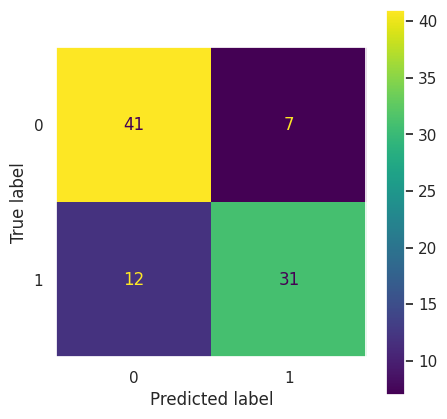

In [219]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=classification.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classification.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

Veamos la curva ROC:

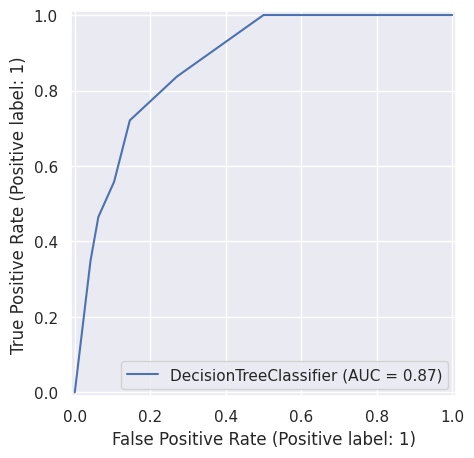

In [220]:
from sklearn.metrics import RocCurveDisplay
    
fig, ax = plt.subplots(figsize=(5,5))
svc_disp = RocCurveDisplay.from_estimator(classification, X_test, y_test, ax=ax)

plt.show();

Comparemos con nuestro modelo de SVC:

| Modelo                   | Exactitud  | F1   | Precisión | Recuperación |
|--------------------------|------------|------|-----------|--------------|
| Arbol de clasificación   | 0.79       | 0.76 | 0.82      | 0.72         |
| SVC                      | 0.85       | 0.86 | 0.80      | 0.93         |

----
Veamos un modelo de dos dimensiones para ver como es la región de clasificación de un modelo

In [221]:
X = df_heart.loc[:, ["age", "trestbps"]].values
y = df_heart.iloc[:, -1].values

# Creamos el arbol
classification = DecisionTreeClassifier(max_depth=50, criterion='entropy', random_state=42)

# Y entrenamos
classification.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,50
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


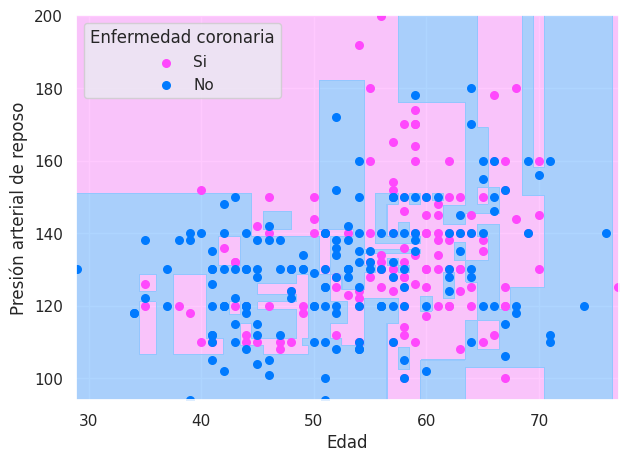

In [222]:
from auxiliary import plot_boundary

plot_boundary(X, y, classification, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(7, 5),
              label_point = ("Si", "No"),
              legend=True,
              legend_title="Enfermedad coronaria",
              labels_axis=("Edad", "Presión arterial de reposo"),
              point_size=30);